In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd

In [2]:
X = np.genfromtxt("hw02_data_points.csv", delimiter = ",") / 255
y = np.genfromtxt("hw02_class_labels.csv", delimiter = ",").astype(int)

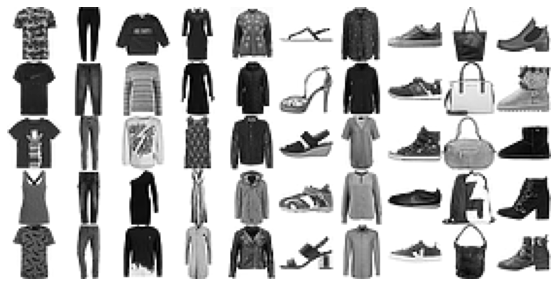

In [3]:
i1 = np.hstack((np.reshape(X[np.where(y == 1)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 2)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 3)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 4)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 5)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 6)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 7)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 8)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 9)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 10)[0][0:5], :], (28 * 5, 28))))

fig = plt.figure(figsize = (10, 5))
plt.axis("off")
plt.imshow(i1, cmap = "gray")
plt.show()
fig.savefig("hw02_images.pdf", bbox_inches = "tight")

In [4]:
# STEP 3
# first 60000 data points should be included to train
# remaining 10000 data points should be included to test
# should return X_train, y_train, X_test, and y_test
def train_test_split(X, y):
    # your implementation starts below 
    X_train = X[:60000]
    y_train = y[:60000]
    X_test = X[60000:]
    y_test = y[60000:]
    # your implementation ends above
    return(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:

# STEP 4
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def sigmoid(X, W, w0):
    # your implementation starts below
    
    # X: N x D matrix (N data points with D features)
    # W: D x K matrix (D features for K classes)
    # w0: K-dimensional vector (biases for K classes)

    # Calculate the linear combination for each data point and class
    lc = np.dot(X, W) + w0

    # Apply the sigmoid function element-wise
    scores = 1 / (1 + np.exp(-lc))

    # your implementation ends above
    return(scores)

In [14]:
len(y_test)

10000

In [68]:
# STEP 5
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def one_hot_encoding(y):
    # your implementation starts below
    N = y.shape[0]
    Y = np.zeros((N, K), dtype=int)

    for i in range(N):
        # Decrement the class label by 1 to make it 0-based
        class_index = y[i] - 1
        Y[i, class_index] = 1

    # your implementation ends above
    return(Y)
np.random.seed(421)
D = X_train.shape[1]
K = np.max(y_train)
Y_train = one_hot_encoding(y_train)
W_initial = np.random.uniform(low = -0.001, high = 0.001, size = (D, K))
w0_initial = np.random.uniform(low = -0.001, high = 0.001, size = (1, K))

In [54]:
Y_train.shape

(60000, 11)

In [28]:
len(y_train)

60000

In [69]:
# STEP 6
# assuming that there are D features and K classes
# should return a numpy array with shape (D, K)
def gradient_W(X, Y_truth, Y_predicted):
    # your implementation starts below
    N, D = X.shape
    K = Y_truth.shape[1]
    gradient = np.dot(X.T, (Y_predicted - Y_truth)) / N
    
   
    # your implementation ends above
    return(gradient)

In [70]:
# assuming that there are K classes
# should return a numpy array with shape (1, K)
def gradient_w0(Y_truth, Y_predicted):
    # your implementation starts below
    #N = Y_truth.shape[0]
    #gradient = np.sum(Y_predicted - Y_truth, axis=0) / N
    # your implementation ends above
    N = Y_truth.shape[0]
    K = Y_truth.shape[1]

    # Compute the gradient with respect to w0
    gradient = np.sum(Y_predicted - Y_truth, axis=0, keepdims=True) / N

    return(gradient)

In [77]:
def discrimination_by_regression(X_train, Y_train, W_initial, w0_initial):
    eta = 0.15 / X_train.shape[0]
    iteration_count = 250

    W = W_initial
    w0 = w0_initial

    objective_values = []  # To store objective values for plotting

    for iteration in range(iteration_count):
        # Step 1: Compute the predicted probabilities using the sigmoid function
        Y_predicted = sigmoid(X_train, W, w0)

        # Step 2: Calculate the objective value (Sum of Squared Errors)
        error = Y_predicted - Y_train
        objective_value = 0.5 * np.sum(error ** 2)
        objective_values.append(objective_value)

        # Step 3: Calculate the gradients
        grad_w = gradient_W(X_train, Y_train, Y_predicted)
        grad_w0 = gradient_w0(Y_train, Y_predicted)

        # Step 4: Update the model parameters
        W -= eta * grad_w
        w0 -= eta * grad_w0

    return W, w0, objective_values

# Call the function to train the model
W, w0, objective_values = discrimination_by_regression(X_train, Y_train, W_initial, w0_initial)

[[-0.00106548  0.00018922 -0.00042743  0.00026436 -0.00023597 -0.00106801
  -0.00061982  0.00070901  0.00053771  0.00052512]]
[74740.34186581013, 74714.57918430878, 74688.83060087737, 74663.09611029233, 74637.37570732676, 74611.66938675023, 74585.977143329, 74560.2989718259, 74534.63486700029, 74508.98482360838]


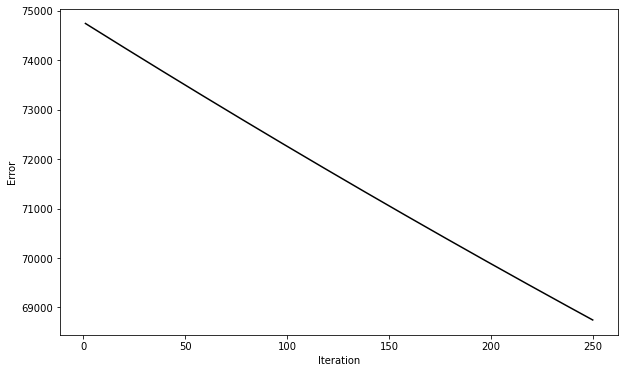

In [79]:
                                                      
print(w0)
print(objective_values[0:10])


fig = plt.figure(figsize = (10, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()
fig.savefig("hw02_iterations.pdf", bbox_inches = "tight")

In [83]:
# STEP 8
# assuming that there are N data points
# should return a numpy array with shape (N,)
def calculate_predicted_class_labels(X, W, w0):
    # your implementation starts below
    #linear_combination = np.dot(X, W) + w0

    # Find the class with the highest probability (argmax) for each data point
    #y_predicted = np.argmax(linear_combination, axis=1)

    # your implementation ends above
    #Y_predicted = sigmoid(X, W, w0)

    # Predict the class labels by selecting the class with the highest probability
    #y_predicted = np.argmax(Y_predicted, axis=1) + 1  # Add 1 to convert back to 1-based labels
    Y_predicted = sigmoid(X, W, w0)

    # Predict the class labels by selecting the class with the highest probability
    y_predicted = np.argmax(Y_predicted, axis=1) + 1
    return(y_predicted)

y_hat_train = calculate_predicted_class_labels(X_train, W, w0)
print(y_hat_train)

y_hat_test = calculate_predicted_class_labels(X_test, W, w0)
print(y_hat_test)

[5 5 5 ... 5 5 5]
[5 5 5 ... 5 5 5]


In [98]:
# STEP 9
# assuming that there are K classes
# should return a numpy array with shape (K, K)
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(y_truth, y_predicted):
    # your implementation starts below
    #confusion_matrix = np.zeros((K, K), dtype=int)
    #c_m = confusion_matrix(y_truth, y_predicted)
    # Iterate through each data point and update the confusion matrix
    #for i in range(len(y_truth)):
     #   true_class = y_truth[i]
      #  predicted_class = y_predicted[i]
       # confusion_matrix[true_class, predicted_class] += 1
    num_classes = 10
    confusion_matrix = [[0] * num_classes for _ in range(num_classes)]

    for true_label, predicted_label in zip(y_truth, y_predicted):
        confusion_matrix[true_label - 1][predicted_label - 1] += 1  # Adjust for 0-based indexing

    

    # your implementation ends above
    return(confusion_matrix)

confusion_train = calculate_confusion_matrix(y_train, y_hat_train)
print(confusion_train)

confusion_test = calculate_confusion_matrix(y_test, y_hat_test)
print(confusion_test)

[[0, 0, 0, 0, 6000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6000, 0, 0, 0, 0, 0], [0, 1, 7, 0, 5992, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6000, 0, 0, 0, 0, 0], [0, 0, 7, 0, 5993, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5999, 0, 1, 0, 0, 0], [0, 0, 5, 0, 5994, 0, 1, 0, 0, 0], [0, 0, 0, 0, 6000, 0, 0, 0, 0, 0], [0, 34, 14, 0, 5949, 0, 3, 0, 0, 0], [0, 0, 0, 0, 5999, 0, 1, 0, 0, 0]]
[[0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 0, 1, 0, 999, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 0, 1, 0, 999, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0], [0, 3, 1, 0, 996, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1000, 0, 0, 0, 0, 0]]
